# Areal Project

<div>
<img src="logo.jpg", width=150, ALIGN="left", border=20>

ALL INFORMATION, SOFTWARE, DOCUMENTATION, AND DATA ARE PROVIDED "AS-IS". The CDS, CHALEARN, AND/OR OTHER ORGANIZERS OR CODE AUTHORS DISCLAIM ANY EXPRESSED OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR ANY PARTICULAR PURPOSE, AND THE WARRANTY OF NON-INFRIGEMENT OF ANY THIRD PARTY'S INTELLECTUAL PROPERTY RIGHTS. IN NO EVENT SHALL AUTHORS AND ORGANIZERS BE LIABLE FOR ANY SPECIAL, 
INDIRECT OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER ARISING OUT OF OR IN CONNECTION WITH THE USE OR PERFORMANCE OF SOFTWARE, DOCUMENTS, MATERIALS, PUBLICATIONS, OR INFORMATION MADE AVAILABLE FOR THE CHALLENGE. 
</div>

<div>
    <h2>Introduction </h2>
    <p>
     <br>
Aerial imagery has been a primary source of geographic data for quite a long time. With technology progress, aerial imagery became really practical for remote sensing : the science of obtaining information about an object, area or phenomenon.
Nowadays, New challenges in remote sensing impose the necessity of designing
pixel classification methods that, once trained on a certain dataset, generalize to other areas of the earth.
In this challenge, we will thus design pixel classification methods on areas.  The goal is to find urban areas in the Areal dataset. Areal Dataset is a small data set created from the <a href="https://project.inria.fr/aerialimagelabeling/">Inria Aerial Image Labeling Dataset</a>. The data set contains covers a wide range of urban settlement appearances from 5 differents cities of different geographic locations. The data set is divided into 3 parts : training set, validation set and test set.

References and credits: 
Emmanuel Maggiori, Yuliya Tarabalka, Guillaume Charpiat, Pierre Alliez.
</div>

In [1]:
import numpy as np
import random
from sample_code_submission.model import AlexNetModel
import re

In [2]:
model_dir = "sample_code_submission"
result_dir = 'sample_result_submission/' 
problem_dir = 'ingestion_program/'  
score_dir = 'scoring_program/'

In [3]:
from sys import path; path.append(model_dir); path.append(problem_dir); path.append(score_dir);

<div>
    <h1> Step 1: Exploratory data analysis </h1>
<p>
We provide sample_data with the starting kit, but to prepare your submission, you must fetch the public_data from the challenge website and point to it.
</div>

In [4]:
data_dir = 'sample_data'
data_name = 'Areal'

In [5]:
from ingestion_program.data_io import read_as_df
data = read_as_df(data_dir  + '/' + data_name)

Reading sample_data/Areal_train from AutoML format
Number of examples = 65
Number of features = 196608
        Class
0       beach
1   chaparral
2       cloud
3      desert
4      forest
5      island
6        lake
7      meadow
8    mountain
9       river
10        sea
11   snowberg
12    wetland
Number of classes = 13


In [6]:
# print(data.head(1))
data.head()

,pixel_1_1_R,pixel_1_1_G,pixel_1_1_B,pixel_1_2_R,pixel_1_2_G,pixel_1_2_B,pixel_1_3_R,pixel_1_3_G,pixel_1_3_B,pixel_1_4_R,...,pixel_256_254_R,pixel_256_254_G,pixel_256_254_B,pixel_256_255_R,pixel_256_255_G,pixel_256_255_B,pixel_256_256_R,pixel_256_256_G,pixel_256_256_B,target
0,23,26,31,23,26,31,24,27,32,24,...,53,54,58,39,40,44,50,51,55,sea
1,135,126,111,142,133,118,144,135,120,138,...,155,140,121,154,139,120,159,144,125,chaparral
2,236,241,244,235,240,243,234,239,242,235,...,151,156,159,152,157,160,159,164,167,snowberg
3,26,27,32,27,28,33,28,29,34,29,...,33,33,35,32,32,34,31,31,33,island
4,45,64,60,45,64,60,46,65,61,46,...,26,45,39,11,30,24,46,65,59,sea


In [7]:
data.describe()

,pixel_1_1_R,pixel_1_1_G,pixel_1_1_B,pixel_1_2_R,pixel_1_2_G,pixel_1_2_B,pixel_1_3_R,pixel_1_3_G,pixel_1_3_B,pixel_1_4_R,...,pixel_256_253_B,pixel_256_254_R,pixel_256_254_G,pixel_256_254_B,pixel_256_255_R,pixel_256_255_G,pixel_256_255_B,pixel_256_256_R,pixel_256_256_G,pixel_256_256_B
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,...,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,94.630769,97.953846,88.584615,95.230769,98.538462,89.107692,95.661538,98.907692,89.461538,96.230769,...,86.061538,85.876923,90.323077,82.123077,85.061538,89.430769,81.400000,87.553846,92.184615,84.000000
std,62.544377,51.831587,51.066713,63.382216,52.755947,51.764528,62.877181,51.762294,50.774956,63.114670,...,44.360342,58.938397,47.980174,45.363638,60.035374,48.742297,45.500962,59.485300,47.718868,43.852024
min,4.000000,7.000000,0.000000,9.000000,12.000000,3.000000,11.000000,14.000000,5.000000,10.000000,...,19.000000,15.000000,22.000000,8.000000,10.000000,11.000000,5.000000,17.000000,19.000000,14.000000
25%,50.000000,65.000000,51.000000,52.000000,63.000000,48.000000,52.000000,65.000000,53.000000,51.000000,...,45.000000,39.000000,53.000000,44.000000,38.000000,52.000000,43.000000,43.000000,53.000000,45.000000
50%,67.000000,79.000000,69.000000,66.000000,79.000000,75.000000,67.000000,78.000000,71.000000,71.000000,...,76.000000,64.000000,77.000000,72.000000,62.000000,72.000000,73.000000,62.000000,78.000000,73.000000
75%,135.000000,132.000000,130.000000,142.000000,133.000000,130.000000,137.000000,135.000000,127.000000,137.000000,...,119.000000,135.000000,127.000000,118.000000,134.000000,120.000000,120.000000,142.000000,132.000000,125.000000
max,246.000000,242.000000,244.000000,242.000000,240.000000,243.000000,240.000000,239.000000,242.000000,243.000000,...,236.000000,232.000000,230.000000,236.000000,233.000000,210.000000,218.000000,234.000000,195.000000,194.000000


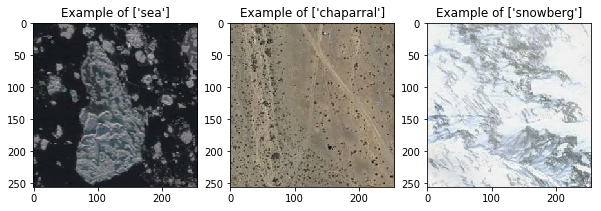

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

num_toshow = 3
fig, _axs = plt.subplots(nrows=1, ncols=num_toshow, figsize=(10,10))
fig.subplots_adjust(hspace=0.3)
axs = _axs.flatten()

for i in range(num_toshow):
    img = data.values[i][:-1].reshape(256,256,3)
    label = data.values[i][-1:]
    axs[i].set_title('Example of {}'.format(label))
    axs[i].imshow(img.astype(float) / 255)

plt.show()

In [19]:
print(data.iloc[:, -1:])
X = data.iloc[:, :-1]
y = data.iloc[:, -1:]

       target
0         sea
1   chaparral
2    snowberg
3      island
4         sea
5     wetland
6      forest
7   chaparral
8     wetland
9      desert
10     forest
11      river
12     island
13   snowberg
14   snowberg
15      beach
16    wetland
17     forest
18     meadow
19     meadow
20     meadow
21   mountain
22      river
23     island
24     forest
25        sea
26        sea
27      beach
28      cloud
29     island
..        ...
35      river
36      cloud
37  chaparral
38      beach
39      river
40       lake
41       lake
42   mountain
43     desert
44      river
45      cloud
46     meadow
47    wetland
48    wetland
49      beach
50        sea
51      cloud
52      beach
53       lake
54     forest
55     island
56   snowberg
57       lake
58   mountain
59       lake
60      cloud
61   snowberg
62     desert
63  chaparral
64  chaparral

[65 rows x 1 columns]


# Step 2 : Building a predictive model

In [20]:
from data_manager import DataManager
D = DataManager(data_name, data_dir, replace_missing=True)
print(D)

Info file found : /home/keanu/Documents/CoursMPI/M2/Projet/Remote-Sensing-Image/starting_kit/sample_data/Areal_public.info
DataManager : Areal
info:
	usage = Sample dataset Areal data
	name = areal
	task = multiclass.classification
	target_type = Categorical
	feat_type = Numerical
	metric = accuracy
	time_budget = 12000
	feat_num = 196608
	target_num = 13
	label_num = 13
	train_num = 65
	valid_num = 13
	test_num = 0
	has_categorical = 0
	has_missing = 0
	is_sparse = 0
	format = dense
data:
	X_train = array(65, 196608)
	Y_train = array(65, 1)
	X_valid = array(13, 196608)
	Y_valid = array(13, 1)
	X_test = array(13, 196608)
	Y_test = array(13, 1)
feat_type:	array(196608,)
feat_idx:	array(0,)



In [21]:
X_train = D.data['X_train']
Y_train = D.data['Y_train']

In [22]:
m = AlexNetModel(verbose=True, use_cuda=False)
trained_model_name = model_dir + data_name

In [23]:
m.fit(X_train, Y_train)

Epoch 0 : loss = 2.682012
Epoch 1 : loss = 2.484041
Epoch 2 : loss = 2.261644
Epoch 3 : loss = 2.076735
Epoch 4 : loss = 1.906370
Epoch 5 : loss = 1.637103
Epoch 6 : loss = 1.361468
Epoch 7 : loss = 1.176206
Epoch 8 : loss = 0.994906
Epoch 9 : loss = 0.826040


In [24]:
Y_hat_train = m.predict(D.data['X_train'])
Y_hat_valid = m.predict(D.data['X_valid'])
Y_hat_test = m.predict(D.data['X_test'])

In [25]:
# m.save(trained_model_name)                 
result_name = result_dir + data_name
from data_io import write
write(result_name + '_train.predict', Y_hat_train)
write(result_name + '_valid.predict', Y_hat_valid)
write(result_name + '_test.predict', Y_hat_test)
!ls $result_name*

sample_result_submission/Areal_test.predict
sample_result_submission/Areal_train.predict
sample_result_submission/Areal_valid.predict


# Scoring the result

In [26]:
from libscores import get_metric
metric_name, scoring_function = get_metric()
print('Using scoring metric:', metric_name)

Using scoring metric: accuracy


In [27]:
print('Training score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_hat_train))
print('Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_train))

Training score for the accuracy metric = 0.3231
Ideal score for the accuracy metric = 1.0000


## confusion matrix

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train, Y_hat_train)

array([[1, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 0],
       [0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 1],
       [0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0],
       [0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 1, 0]])

## Cross validation performance

In [30]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
scores = cross_val_score(m, X_train, Y_train, cv=5, scoring=make_scorer(scoring_function))
print('\nCV score (95 perc. CI): %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

TypeError: new() received an invalid combination of arguments - got (NoneType, int), but expected one of:
 * (torch.device device)
 * (torch.Storage storage)
 * (Tensor other)
 * (tuple of ints size, torch.device device)
      didn't match because some of the arguments have invalid types: ([31;1mNoneType[0m, [31;1mint[0m)
 * (object data, torch.device device)
      didn't match because some of the arguments have invalid types: ([31;1mNoneType[0m, [31;1mint[0m)
